In [1]:
import torch
from torch import nn as nn 
from torch.utils.data import Dataset 
from torch import optim 
from torch.nn import functional as F 
import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(DEVICE)

cpu


In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
class DataSet(Dataset): 
    def __init__(self,path):
        self.dataset = torch.tensor(pd.read_csv(path).values)
    def __len__(self): 
        return len(self.dataset)
    def __getitem__(self,i):
        return self.dataset[i,:-1], self.dataset[i,-1]

In [7]:
class Net(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features #13
        # fully connected
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self , x):
    
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out

In [8]:
def training_loop(n_epoch, optimizer, model, loss_fn, train_loader, test_loader, print_plot):
    
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        for example, label in train_loader:
            
            example = example.to(DEVICE)
            label = label.to(DEVICE)
            
            label = label.unsqueeze(1)
            
            output = model(example.float())
            
            loss = loss_fn(output, label.float())
            
            optimizer.zero_grad()#erorile sunt 0
            loss.backward()
            optimizer.step()
            
        with torch.no_grad():

            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total

        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')
    if print_plot:
        
        epochs = range(n_epoch)

        
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show() 

In [9]:
data = DataSet('diabetes.csv')
n_sample = len(data)
n_test = int(0.2*n_sample)

train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), shuffle= True) # = 10/20 cat vrem
test_loader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set), shuffle= True)

c:\users\pulbe\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.637398362159729 Test Accuracy: 0.6470588445663452
Epoch 20) Train Accuracy: 0.6569105982780457 Test Accuracy: 0.6209150552749634
Epoch 30) Train Accuracy: 0.6845528483390808 Test Accuracy: 0.673202633857727
Epoch 40) Train Accuracy: 0.6796748042106628 Test Accuracy: 0.7058823704719543
Epoch 50) Train Accuracy: 0.7040650248527527 Test Accuracy: 0.7189542651176453
Epoch 60) Train Accuracy: 0.7186991572380066 Test Accuracy: 0.7189542651176453
Epoch 70) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.7320261597633362
Epoch 80) Train Accuracy: 0.7349593639373779 Test Accuracy: 0.6993464231491089
Epoch 90) Train Accuracy: 0.7463414669036865 Test Accuracy: 0.686274528503418
Epoch 100) Train Accuracy: 0.7658536434173584 Test Accuracy: 0.7058823704719543
Epoch 110) Train Accuracy: 0.7707316875457764 Test Accuracy: 0.6928104758262634
Epoch 120) Train Accuracy: 0.7593495845794678 Test Accuracy: 0.7124183177947998
Epoch 130) Train Accuracy: 0.7756097316741943 Test A

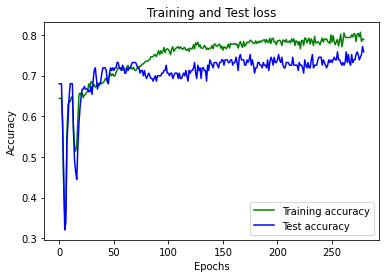

In [17]:
learning_rate = 0.02

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
n_epoch = 280,
optimizer = optimizer,
model = model,
loss_fn=loss_fn,
train_loader=train_loader,
test_loader=test_loader,
print_plot = True
)

c:\users\pulbe\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.6211382150650024 Test Accuracy: 0.6078431606292725
Epoch 20) Train Accuracy: 0.6747967600822449 Test Accuracy: 0.6797385811805725
Epoch 30) Train Accuracy: 0.6878048777580261 Test Accuracy: 0.6993464231491089
Epoch 40) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.7189542651176453
Epoch 50) Train Accuracy: 0.7154471278190613 Test Accuracy: 0.7189542651176453
Epoch 60) Train Accuracy: 0.7235772609710693 Test Accuracy: 0.7058823704719543
Epoch 70) Train Accuracy: 0.7333333492279053 Test Accuracy: 0.7058823704719543
Epoch 80) Train Accuracy: 0.7430894374847412 Test Accuracy: 0.7124183177947998
Epoch 90) Train Accuracy: 0.7479674816131592 Test Accuracy: 0.7189542651176453
Epoch 100) Train Accuracy: 0.7593495845794678 Test Accuracy: 0.686274528503418
Epoch 110) Train Accuracy: 0.7642276287078857 Test Accuracy: 0.6797385811805725
Epoch 120) Train Accuracy: 0.767479658126831 Test Accuracy: 0.6797385811805725
Epoch 130) Train Accuracy: 0.777235746383667 Test A

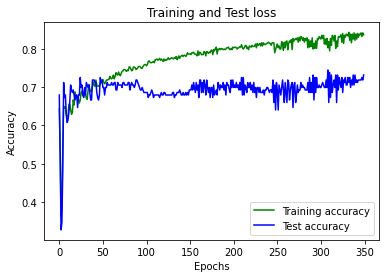

In [16]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
n_epoch = 350,
optimizer = optimizer,
model = model,
loss_fn=loss_fn,
train_loader=train_loader,
test_loader=test_loader,
print_plot = True
)